In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
import matplotlib.patches as patches
import math

In [2]:
ds = xr.open_dataset('ClimProjAll.nc')

In [42]:
year_avg = ds.isel(site=0).mean('gcm').groupby('time.year').mean().to_dataframe()
yr_2017 = 2017-1950

tavg    23.373811
tmax    28.761537
vpd      0.948083
tmin    17.986085
Name: 2017, dtype: float64

In [7]:
#colors for sites
colors = cm.rainbow(np.linspace(0, 1, 13))


In [ ]:
site_num = len(ds['site'])
sites = np.arange(0,site_num,1)

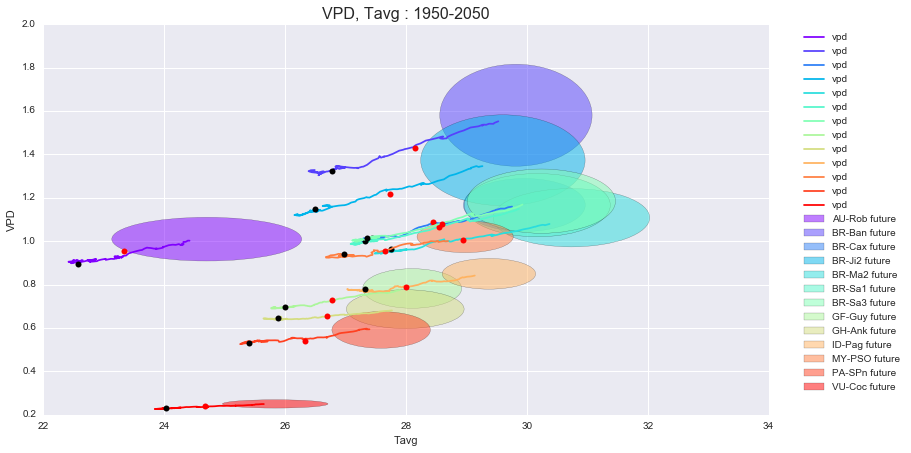

In [48]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
fig1.set_size_inches(13,7)

#set axis bounds to see all data
ax1.set_xbound(lower=21,upper=33)
ax1.set_ybound(lower=0, upper=2)
#set labls
ax1.set_xlabel('Tavg')
ax1.set_ylabel('VPD')
#array of sites
sites = np.arange(0,len(ds['site']),1)
#get index for 2017
yr_2017 = 2017-1950

for i in sites:
    
    #grab each site
    site_data = ds.isel(site=i)
    ##Line Plot/Points
    #grab yearly averages, gcm also averaged
    year_avg = ds.isel(site=i).mean('gcm').groupby('time.year').mean()
    #grab time frame for line plot
    year_avg = year_avg.sel(year=slice('1950-01-01','2050-01-01'))
    #change to pandas dataframe for use of 'rolling' command
    year_avg = year_avg.to_dataframe()
    
    ##Ovals
    #time frame for 1st oval
    site_data_past = site_data.sel(time=slice('1950-01-01','1999-12-01'))
    #time frame for 2nd oval
    site_data_future = site_data.sel(time=slice('2000-01-01','2099-12-01'))
    
    #calculate regression of future time frame for arrow
    slope, intercept, r_value, p_value, std_err = stats.linregress(site_data_future.mean('gcm')['tavg'],site_data_future.mean('gcm')['vpd'])
    #calc standard deviation of future time frame
    future_std = site_data_future.std()
    #calc sigma for past time frame
    past_std = site_data_past.std()
    #Calculate means for future and past time frame
    future_mean = site_data_future.mean()
    past_mean = site_data_past.mean()

    
    #Calculate 95%CI for 'past' time frame
    vpd_interval = stats.norm.interval(0.95, loc=0, scale=past_std['vpd']/np.sqrt(site_num))
    tavg_interval = stats.norm.interval(0.95, loc=0, scale=past_std['tavg']/np.sqrt(site_num))
    #calculate 95%CI for 'future' time frame
    vpd_interval_future = stats.norm.interval(0.95, loc=0, scale=future_std['vpd']/np.sqrt(site_num))
    tavg_interval_future = stats.norm.interval(0.95, loc=0, scale=future_std['tavg']/np.sqrt(site_num))
    
    #extracting variables of interest from 'past'
    tavg_mean = past_mean['tavg']
    vpd_mean = past_mean['vpd']
    
    #extracting variables of interest form 'future'
    tavg_future_mean = future_mean['tavg']
    vpd_future_mean = future_mean['vpd']
    
    ##Line and Point Plotting
    #plot 5 year window average
    ax1.plot(year_avg['tavg'].rolling(window=5).mean(),year_avg['vpd'].rolling(window=5).mean(),color=colors[i])
    #plot year 1 on the plot
    ax1.plot(year_avg.iloc[1]['tavg'],year_avg.iloc[1]['vpd'],marker='.',color='black',markersize=12)
    #plot 2017 on plot
    ax1.plot(year_avg.iloc[yr_2017]['tavg'],year_avg.iloc[yr_2017]['vpd'],marker='.',color='red',markersize=12)

    ##Oval Plotting
    
    #'past' oval
#    ax1.add_patch(
#        patches.Ellipse(
#            (tavg_mean, vpd_mean),   # (x,y)
#            tavg_interval[1]*2,          # width
#            vpd_interval[1]*2,        #height
#            label=ds['site'].values[i]+' past',
#            color=colors[i],
#            #angle=math.degrees(slope)
#        )
#    )
    #'future' oval
    
    ax1.add_patch(
        patches.Ellipse(
            (tavg_future_mean, vpd_future_mean),   # (x,y)
            tavg_interval_future[1]*2,          # width
            vpd_interval_future[1]*2,        #height
            label=ds['site'].values[i]+' future',
            facecolor=colors[i],
            #angle=math.degrees(slope),
            alpha=.5,
            edgecolor='black'
        )
    )
    #plot arrow using linear regression slope as angle of arrow from x-axis
#    ax1.arrow(tavg_mean,vpd_mean,dx=.5*math.cos(slope),dy=.5*math.sin(slope),head_width=.1,width=.02,color='black',alpha=.5)
#plot parameters
plt.legend(bbox_to_anchor=(1.05, .9),bbox_transform=plt.gcf().transFigure)
plt.title('VPD, Tavg : 1950-2050', size=16)

#save figure
plt.savefig('climatefigure_GB_line_ovals_test.png', dpi=300, bbox_inches='tight')

In [ ]:
mean, sigma = np.mean(time_mean['tavg']), np.std(time_mean['tavg'])

In [ ]:

Ellipse(xy=rnd.rand(2)*10, width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360)

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
f.set_size_inches(13,7)
for i in np.arange(0,len(ds['site']),1):
    
    data = ds.isel(site=i)

    data = data.mean('gcm')
    tmax = data['tmax']
    tmin = data['tmin']
    vpd = data['vpd']

    tmax = tmax.to_dataframe()
    tmin = tmin.to_dataframe()
    vpd = vpd.to_dataframe()

    tmax = tmax.rolling(window=12).mean()
    tmin = tmin.rolling(window=12).mean()
    vpd = vpd.rolling(window=12).mean()

    #f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    ax1.plot(tmax, label=ds['site'].values[i], color=current_palette[i])
    ax1.set_title('Tmax')
    ax2.plot(tmin, label=ds['site'].values[i], color=current_palette[i])
    ax2.set_title('Tmin')
    ax3.plot(vpd, label=ds['site'].values[i], color=current_palette[i])
    ax3.set_title('VPD')
    
plt.legend(bbox_to_anchor=(1.01, .91),bbox_transform=plt.gcf().transFigure)
plt.suptitle('Past and Future Climate', size=16)
plt.savefig('rough_climatefigure_GB_12m_mean.png', dpi=300, bbox_inches='tight')

In [ ]:
vpd_mean


In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.set_xbound(lower=20,upper=30)
ax1.set_ybound(lower=-2, upper=2)
ax1.add_patch(
    patches.Ellipse(
        (tavg_mean, vpd_mean),   # (x,y)
        test_tavg[1],          # width
        test_vpd[1],          # height
    )
)

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(r.mean())
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')